In [1]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

from Expectation_EulerCharacteristic.sphere import euler_characteristic

In [2]:
output = Parallel(n_jobs=8, verbose=9)(
    delayed(euler_characteristic)(10, 2, np.linspace(0, np.pi, 1000))
    for _ in range(40000)
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  80 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 223 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 776 tasks      | elapsed:    1.7s


None


[Parallel(n_jobs=8)]: Done 3336 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 8200 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done 13576 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 19464 tasks      | elapsed:    7.9s
[Parallel(n_jobs=8)]: Done 25864 tasks      | elapsed:   10.0s
[Parallel(n_jobs=8)]: Done 32776 tasks      | elapsed:   12.0s
[Parallel(n_jobs=8)]: Done 39057 tasks      | elapsed:   14.1s
[Parallel(n_jobs=8)]: Done 40000 out of 40000 | elapsed:   14.2s finished


In [3]:
output = np.asarray([el for el in output if el is not None])
print(output.shape)

(39999, 1000)


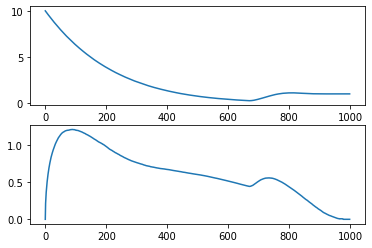

In [4]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(
    output.mean(axis=0)
)
axs[1].plot(
    output.std(axis=0)
)
plt.show()

In [5]:
np.save('ECC_sphere.npy', output)